## FULL WORKING CODE

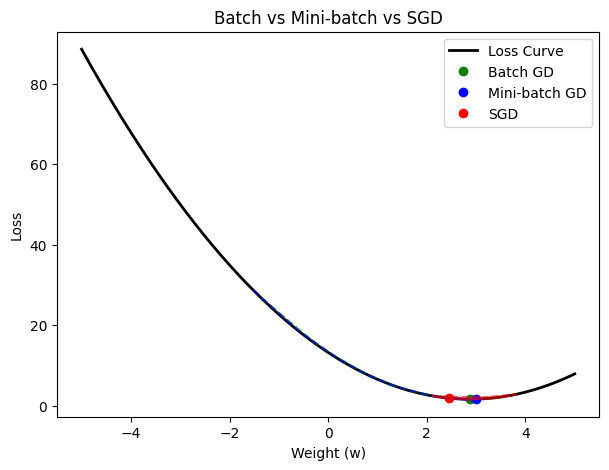

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# -------------------------------------
# Create output folder
# -------------------------------------
os.makedirs("gifs", exist_ok=True)

# -------------------------------------
# Dataset (simple regression)
# -------------------------------------
np.random.seed(0)
X = np.linspace(-2, 2, 40)
y = 3 * X + 1 + np.random.randn(len(X)) * 0.5

# -------------------------------------
# Loss + gradient
# -------------------------------------
def loss(w):
    return np.mean((w * X - y) ** 2)

def grad(w, x_batch, y_batch):
    return 2 * np.mean((w * x_batch - y_batch) * x_batch)

# -------------------------------------
# Training setup
# -------------------------------------
lr = 0.1
steps = 40

# Initial weights
w_batch = -3.0
w_mini = -3.0
w_sgd = -3.0

hist_batch, hist_mini, hist_sgd = [], [], []

batch_size = 8

# -------------------------------------
# Training loops
# -------------------------------------
for _ in range(steps):

    # ----- Batch GD -----
    g = grad(w_batch, X, y)
    w_batch -= lr * g
    hist_batch.append(w_batch)

    # ----- Mini-batch GD -----
    idx = np.random.choice(len(X), batch_size, replace=False)
    g = grad(w_mini, X[idx], y[idx])
    w_mini -= lr * g
    hist_mini.append(w_mini)

    # ----- SGD -----
    i = np.random.randint(len(X))
    g = grad(w_sgd, X[i:i+1], y[i:i+1])
    w_sgd -= lr * g
    hist_sgd.append(w_sgd)

# -------------------------------------
# Visualization setup
# -------------------------------------
w_vals = np.linspace(-5, 5, 400)
loss_vals = [loss(w) for w in w_vals]

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(w_vals, loss_vals, "k", lw=2, label="Loss Curve")

p_batch, = ax.plot([], [], "go", label="Batch GD")
p_mini,  = ax.plot([], [], "bo", label="Mini-batch GD")
p_sgd,   = ax.plot([], [], "ro", label="SGD")

path_batch, = ax.plot([], [], "g--", alpha=0.6)
path_mini,  = ax.plot([], [], "b--", alpha=0.6)
path_sgd,   = ax.plot([], [], "r--", alpha=0.6)

ax.set_xlabel("Weight (w)")
ax.set_ylabel("Loss")
ax.set_title("Batch vs Mini-batch vs SGD")
ax.legend()

# -------------------------------------
# Animation
# -------------------------------------
writer = PillowWriter(fps=2)

with writer.saving(fig, "gifs/batch_vs_minibatch_vs_sgd.gif", dpi=120):
    for i in range(steps):
        # Batch
        wb = hist_batch[i]
        p_batch.set_data([wb], [loss(wb)])
        path_batch.set_data(hist_batch[:i+1],
                            [loss(v) for v in hist_batch[:i+1]])

        # Mini-batch
        wm = hist_mini[i]
        p_mini.set_data([wm], [loss(wm)])
        path_mini.set_data(hist_mini[:i+1],
                           [loss(v) for v in hist_mini[:i+1]])

        # SGD
        ws = hist_sgd[i]
        p_sgd.set_data([ws], [loss(ws)])
        path_sgd.set_data(hist_sgd[:i+1],
                          [loss(v) for v in hist_sgd[:i+1]])

        writer.grab_frame()

plt.show()
